> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import locale
% matplotlib inline 

locale.setlocale(locale.LC_ALL,'')


'en_US.UTF-8'

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
movies = pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv')

In [3]:
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
movies.shape

(10866, 21)

In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [6]:
# drop redundant & content related columns
# popularity is a function of vote_count and vote_average, so can remove vote_count and vote_average to exlude double counting 

# imdb is just another movie database with an entry for almost every tmdb movie

# tagline, keywords, overview, cast - they vary by title and won't help much in the purpose of this research. however, we have kept the genre column to see if content's impact in movie popularity and revenue performance

movies.drop(['vote_count','vote_average','imdb_id','tagline','keywords','overview','cast'],axis=1,inplace=True)

In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
id                      10866 non-null int64
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
homepage                2936 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(3), int64(5), object(6)
memory usage: 1.2+ MB


In [8]:
movies.describe()

,id,popularity,budget,revenue,runtime,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,2015.000000,4.250000e+08,2.827124e+09


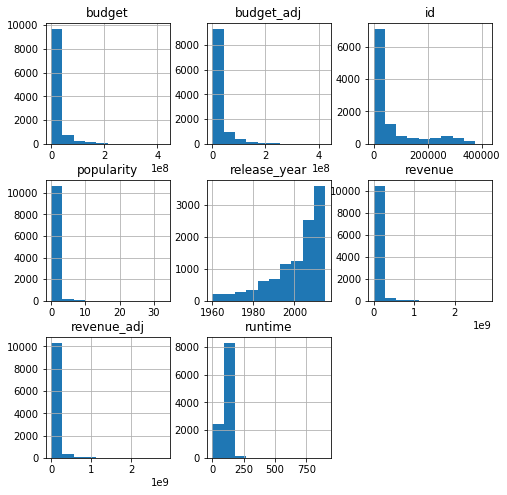

In [9]:
movies.hist(figsize=(8,8));

In [10]:
# find duplicates
sum(movies.duplicated())

1

In [11]:
movies.drop_duplicates(inplace=True)

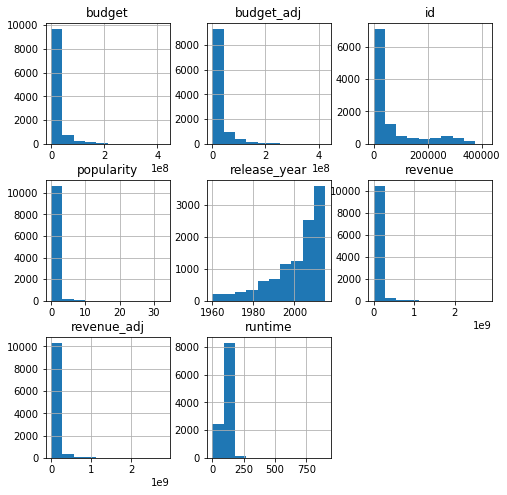

In [12]:
movies.hist(figsize=(8,8));

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: Which is the mean and median budget for a movie?

In [13]:
# removes entries whereby revenue and budget are zero
zero_budget_movie = movies[movies['budget_adj']==0 ].index
properly_budgeted_movies = movies.drop(zero_budget_movie)

In [14]:
mean_budget = int(properly_budgeted_movies.budget_adj.mean())
median_budget = int(properly_budgeted_movies.budget_adj.median())
print("Mean budget for a movie is USD "+ locale.format("%d",mean_budget,grouping=True) +" in 2010 dollars. Median budget for a movie is USD "+ locale.format("%d",median_budget,grouping=True) + ' in 2010 dollars.')

Mean budget for a movie is USD 36,889,069 in 2010 dollars. Median budget for a movie is USD 22,715,052 in 2010 dollars.


### Research Question 2 : is longer movies more costly to make?

In [15]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
median_runtime = properly_budgeted_movies.runtime.median()
print(median_runtime)

103.0


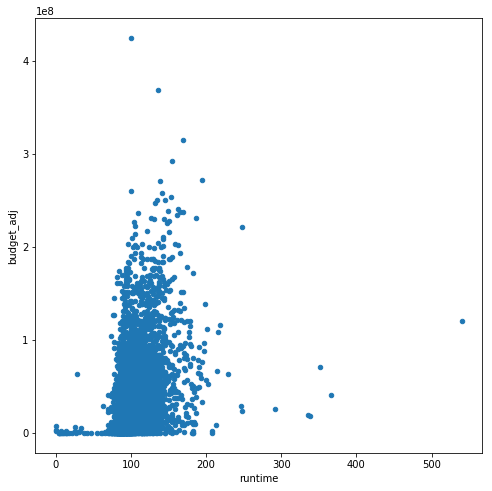

In [16]:
# visualize the relationship between movie runtime and budget (in 2010 dollars) to 
properly_budgeted_movies.plot(x='runtime',y='budget_adj',kind='scatter',figsize=(8,8));

In [17]:
short_movies = properly_budgeted_movies.query('runtime<{}'.format(median_runtime))
long_movies = properly_budgeted_movies.query('runtime>={}'.format(median_runtime))

In [18]:
short_movies.describe()

,id,popularity,budget,revenue,runtime,release_year,budget_adj,revenue_adj
count,2536.000000,2536.000000,2.536000e+03,2.536000e+03,2536.000000,2536.000000,2.536000e+03,2.536000e+03
mean,50786.917981,0.747128,2.165866e+07,4.992522e+07,91.774054,2002.248817,2.521508e+07,6.067307e+07
std,76246.917070,0.789792,3.071302e+07,1.094429e+08,10.292671,10.950597,3.319113e+07,1.287122e+08
min,5.000000,0.001117,1.000000e+00,0.000000e+00,0.000000,1960.000000,9.210911e-01,0.000000e+00
25%,10016.750000,0.288714,3.112500e+06,0.000000e+00,89.000000,1997.000000,4.206674e+06,0.000000e+00
50%,15319.500000,0.517281,1.000000e+07,7.667475e+06,93.000000,2005.000000,1.294363e+07,9.538471e+06
75%,50875.500000,0.941303,2.600000e+07,4.915564e+07,98.000000,2011.000000,3.324105e+07,6.485495e+07
max,417859.000000,11.422751,4.250000e+08,1.274219e+09,102.000000,2015.000000,4.250000e+08,1.574815e+09


In [19]:
long_movies.describe()

,id,popularity,budget,revenue,runtime,release_year,budget_adj,revenue_adj
count,2633.000000,2633.000000,2.633000e+03,2.633000e+03,2633.000000,2633.000000,2.633000e+03,2.633000e+03
mean,40434.797949,1.228636,3.948595e+07,1.095381e+08,121.853779,2000.290163,4.813299e+07,1.421878e+08
std,68807.945899,1.659775,4.367370e+07,1.914776e+08,21.806178,12.447158,4.624270e+07,2.369626e+08
min,11.000000,0.006640,8.000000e+00,0.000000e+00,103.000000,1960.000000,8.102293e+00,0.000000e+00
25%,4192.000000,0.424197,1.100000e+07,5.359645e+06,109.000000,1994.000000,1.577503e+07,7.160736e+06
50%,11087.000000,0.759673,2.500000e+07,4.045264e+07,117.000000,2004.000000,3.320834e+07,5.660523e+07
75%,38408.000000,1.396973,5.000000e+07,1.284992e+08,128.000000,2010.000000,6.545264e+07,1.753697e+08
max,414419.000000,32.985763,3.800000e+08,2.781506e+09,540.000000,2015.000000,3.683713e+08,2.827124e+09


In [20]:
short_movies_mean_budget = short_movies.budget_adj.mean()
long_movies_mean_budget = long_movies.budget_adj.mean()

if short_movies_mean_budget > long_movies_mean_budget:
    print("no, on average, movies shorter than " + str(median_runtime) + " minutes are more costly to make with a mean budget of USD "+locale.format("%d",short_movies_mean_budget,grouping=True)+" in 2010 dollars")
else:
    print("yes, on average, movies longer than " + str(median_runtime) + " minutes are more costly to make with a mean budget of USD "+locale.format("%d",long_movies_mean_budget,grouping=True)+" in 2010 dollars")

yes, on average, movies longer than 103.0 minutes are more costly to make with a mean budget of USD 48,132,986 in 2010 dollars


### Research Question 3: Is longer movies more profitable?

In [21]:
# add a new column called roi to measure the return of investment for each movie
# as we only have the investment/budget data for a subset of movies, we use a subset of the movies database, i.e. those with budget numbers 
properly_budgeted_movies['roi'] = properly_budgeted_movies['revenue']/properly_budgeted_movies['budget']


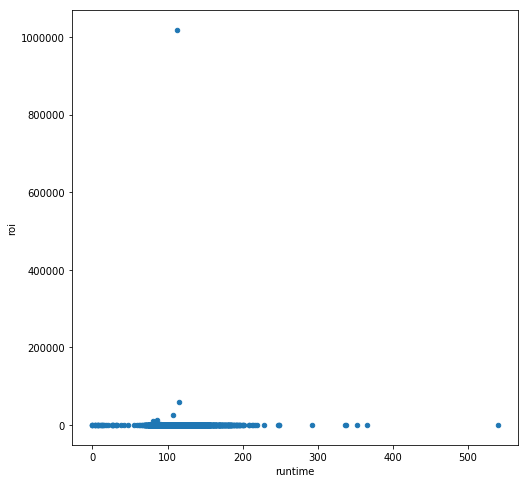

In [22]:
properly_budgeted_movies.plot(x='runtime',y='roi',kind='scatter',figsize = (8,8));

In [23]:
# separate properly budgeted movies into two dataframes based on median runtime 
short_movies = properly_budgeted_movies.query('runtime<{}'.format(median_runtime))
long_movies = properly_budgeted_movies.query('runtime>={}'.format(median_runtime))

In [24]:
short_movies.describe()

,id,popularity,budget,revenue,runtime,release_year,budget_adj,revenue_adj,roi
count,2536.000000,2536.000000,2.536000e+03,2.536000e+03,2536.000000,2536.000000,2.536000e+03,2.536000e+03,2536.000000
mean,50786.917981,0.747128,2.165866e+07,4.992522e+07,91.774054,2002.248817,2.521508e+07,6.067307e+07,13.932580
std,76246.917070,0.789792,3.071302e+07,1.094429e+08,10.292671,10.950597,3.319113e+07,1.287122e+08,325.005412
min,5.000000,0.001117,1.000000e+00,0.000000e+00,0.000000,1960.000000,9.210911e-01,0.000000e+00,0.000000
25%,10016.750000,0.288714,3.112500e+06,0.000000e+00,89.000000,1997.000000,4.206674e+06,0.000000e+00,0.000000
50%,15319.500000,0.517281,1.000000e+07,7.667475e+06,93.000000,2005.000000,1.294363e+07,9.538471e+06,0.687299
75%,50875.500000,0.941303,2.600000e+07,4.915564e+07,98.000000,2011.000000,3.324105e+07,6.485495e+07,2.806127
max,417859.000000,11.422751,4.250000e+08,1.274219e+09,102.000000,2015.000000,4.250000e+08,1.574815e+09,12890.386667


In [25]:
long_movies.describe()

,id,popularity,budget,revenue,runtime,release_year,budget_adj,revenue_adj,roi
count,2633.000000,2633.000000,2.633000e+03,2.633000e+03,2633.000000,2633.000000,2.633000e+03,2.633000e+03,2.633000e+03
mean,40434.797949,1.228636,3.948595e+07,1.095381e+08,121.853779,2000.290163,4.813299e+07,1.421878e+08,4.228325e+02
std,68807.945899,1.659775,4.367370e+07,1.914776e+08,21.806178,12.447158,4.624270e+07,2.369626e+08,1.989039e+04
min,11.000000,0.006640,8.000000e+00,0.000000e+00,103.000000,1960.000000,8.102293e+00,0.000000e+00,0.000000e+00
25%,4192.000000,0.424197,1.100000e+07,5.359645e+06,109.000000,1994.000000,1.577503e+07,7.160736e+06,3.891047e-01
50%,11087.000000,0.759673,2.500000e+07,4.045264e+07,117.000000,2004.000000,3.320834e+07,5.660523e+07,1.650755e+00
75%,38408.000000,1.396973,5.000000e+07,1.284992e+08,128.000000,2010.000000,6.545264e+07,1.753697e+08,3.578512e+00
max,414419.000000,32.985763,3.800000e+08,2.781506e+09,540.000000,2015.000000,3.683713e+08,2.827124e+09,1.018619e+06


In [26]:
# from the scatter plot, we can see there are a couple of outliers
# therefore, we use median roi to compare the profitability of long/short movies and eliminate any potential impact of outliers
short_movies_median_roi = short_movies.roi.median()
long_movies_median_roi = long_movies.roi.median()

In [27]:
if short_movies_median_roi > long_movies_median_roi:
    print("no, on average, movies shorter than " + str(median_runtime) + " minutes are more profitable with a median return on investment of "+ str(round(short_movies_median_roi,2)))
else:
    print("yes, on average, movies longer than " + str(median_runtime) + " minutes are more profitable with a median return on investment of "+ str(round(long_movies_median_roi,2)))

yes, on average, movies longer than 103.0 minutes are more profitable with a median return on investment of 1.65


### Research Question 4: is longer movies more popular?

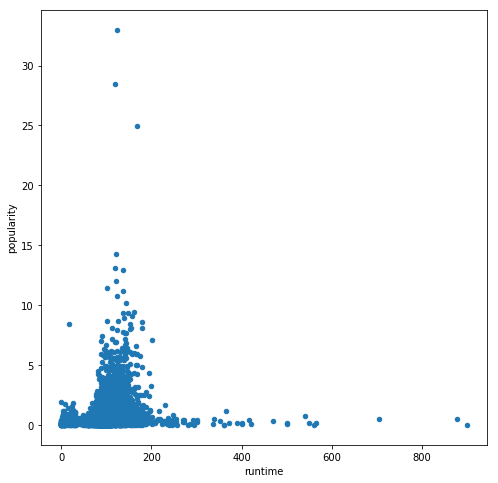

In [28]:
movies.plot(x='runtime',y='popularity',kind='scatter',figsize=(8,8));

In [29]:
# scatter plot shows popularity is rightly skewed versus runtime 
# separate all movies into long and short movies based on median runtime 
all_movies_median_runtime = movies.runtime.median()
short_movies_all = movies.query('runtime<{}'.format(all_movies_median_runtime))
long_movies_all = movies.query('runtime>={}'.format(all_movies_median_runtime))

In [30]:
short_movies_all.describe()

,id,popularity,budget,revenue,runtime,release_year,budget_adj,revenue_adj
count,5382.000000,5382.000000,5.382000e+03,5.382000e+03,5382.000000,5382.000000,5.382000e+03,5.382000e+03
mean,79336.083055,0.470409,7.534480e+06,1.907377e+07,85.189521,2003.183203,8.784524e+06,2.360073e+07
std,99825.618603,0.544980,2.011029e+07,7.056983e+07,18.155775,11.911192,2.227570e+07,8.438015e+07
min,5.000000,0.000620,0.000000e+00,0.000000e+00,0.000000,1960.000000,0.000000e+00,0.000000e+00
25%,13166.500000,0.171398,0.000000e+00,0.000000e+00,85.000000,1998.000000,0.000000e+00,0.000000e+00
50%,27275.500000,0.319342,0.000000e+00,0.000000e+00,90.000000,2007.000000,0.000000e+00,0.000000e+00
75%,102645.750000,0.559431,4.800000e+06,2.048122e+06,94.000000,2012.000000,5.553568e+06,2.658667e+06
max,417859.000000,8.411577,2.000000e+08,1.156731e+09,98.000000,2015.000000,2.032801e+08,1.574815e+09


In [31]:
long_movies_all.describe()

,id,popularity,budget,revenue,runtime,release_year,budget_adj,revenue_adj
count,5483.000000,5483.000000,5.483000e+03,5.483000e+03,5483.000000,5483.000000,5.483000e+03,5.483000e+03
mean,53041.101404,0.819239,2.158349e+07,6.019774e+07,118.643079,1999.494802,2.615380e+07,7.862577e+07
std,81843.855058,1.277049,3.740578e+07,1.463076e+08,32.768178,13.392597,4.118260e+07,1.815763e+08
min,6.000000,0.000065,0.000000e+00,0.000000e+00,99.000000,1960.000000,0.000000e+00,0.000000e+00
25%,9362.500000,0.251234,0.000000e+00,0.000000e+00,104.000000,1992.000000,0.000000e+00,0.000000e+00
50%,15192.000000,0.463790,5.000000e+06,3.166000e+06,111.000000,2003.000000,7.120179e+06,3.969147e+06
75%,49505.500000,0.909852,2.800000e+07,5.384005e+07,123.000000,2010.000000,3.669710e+07,7.488544e+07
max,414419.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,2015.000000,4.250000e+08,2.827124e+09


In [32]:
# from the scatter plot, we can see there are a couple of outliers
# therefore, we use median to compare the popularity of long/short movies and eliminate any potential impact of outliers

all_short_movies_median_popularity = short_movies_all.popularity.median()
all_long_movies_median_popularity = long_movies_all.popularity.median()

if all_short_movies_median_popularity > all_long_movies_median_popularity:
    print("no, on average, movies shorter than " + str(all_movies_median_runtime) + " minutes are more popular with a median popularity score of "+ str(round(all_short_movies_median_popularity,2)))
else:
    print("yes, on average, movies longer than " + str(all_movies_median_runtime) + " minutes are more popular with a median popularity score of "+ str(round(all_long_movies_median_popularity,2)))

yes, on average, movies longer than 99.0 minutes are more popular with a median popularity score of 0.46


### Research Question 5: are more popular movies more profitable?

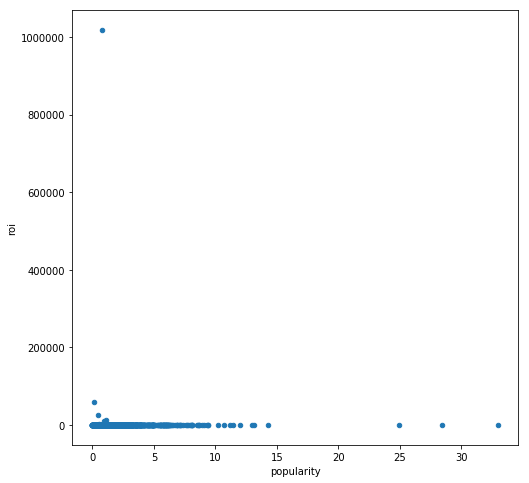

In [33]:
# we excludes movies without any budget information 
properly_budgeted_movies.plot(x='popularity',y='roi',kind='scatter',figsize=(8,8));

In [ ]:
# only movies with proper budget info are included in this analysis
median_popularity = properly_budgeted_movies.popularity.median()
more_popular_movies = properly_budgeted_movies.query('popularity>={}'.format(median_popularity))
less_popular_movies = properly_budgeted_movies.query('popularity<{}'.format(median_popularity))

In [ ]:
more_popular_movies.describe()

In [ ]:
less_popular_movies.describe()

In [ ]:
# from the scatter plot, we can see there are a couple of outliers
# therefore, we use median to compare the roi of the more/less popular movies and eliminate any potential impact of outliers

less_popular_movies_median_roi = less_popular_movies.roi.median()
more_popular_movies_median_roi = more_popular_movies.roi.median()

if less_popular_movies_median_roi < more_popular_movies_median_roi:
    print('yes, on average, movies whose poplarity score is higher than '+str(round(median_popularity,2)) + ' are more profitable with a median return on investment of '+str(round(more_popular_movies_median_roi,2)))
else:
    print('no, on average, movies whose poplarity score is equal to or lower than '+str(round(median_popularity,2)) + ' are more profitable with a median return on investment of '+str(round(less_popular_movies_median_roi,2)))


### Research Question 6: which genres of movies are more popular?

In [34]:
# see all the movie genres in movie database
movies.genres.unique()

array(['Action|Adventure|Science Fiction|Thriller',
       'Adventure|Science Fiction|Thriller',
       'Action|Adventure|Science Fiction|Fantasy', ...,
       'Adventure|Drama|Action|Family|Foreign',
       'Comedy|Family|Mystery|Romance',
       'Mystery|Science Fiction|Thriller|Drama'], dtype=object)

In [35]:
# convert the genre column into a list of genres
movies['genres']=np.where((movies['genres'].str.contains('|')),movies['genres'].str.split('|'),movies['genres'])



In [36]:
# make sure eery row has data as a list, even if only one genre is present
movies.loc[:,'genres']=movies.genres.apply(np.atleast_1d)

#horizontally stack all lists from all rows into one big list
all_genres = np.hstack(movies.genres)

In [37]:
# n contains the popularity for that row while l contains the list of genres for that row
# repeat the popularity as many times as the length of list l and merge it all into one list
all_popularity = []
for n,l in movies[['popularity','genres']].values:
    all_popularity = all_popularity+([n]*len(l))

#assign the merged lists into a new dataframe
a = pd.DataFrame({'genre':all_genres,'popularity':all_popularity})

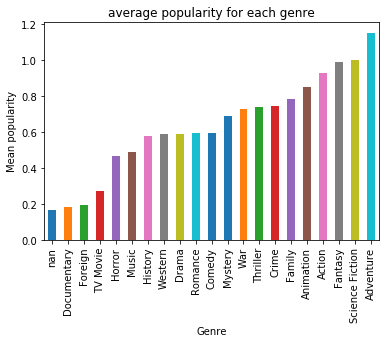

In [38]:
popularity_by_genre = a.sort_values(['popularity']).groupby('genre')['popularity'].mean()
popularity_by_genre.sort_values().plot(kind='bar');
plt.title('average popularity for each genre');
plt.ylabel('Mean popularity');
plt.xlabel('Genre');

### Research Question 7: How has movie production trends over time?

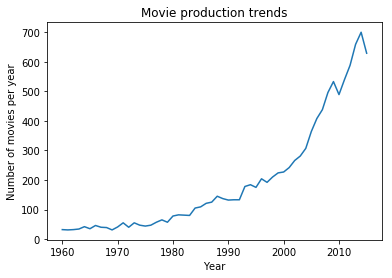

In [39]:
movies_per_year = movies.release_year.value_counts().sort_index();
plt.plot(movies_per_year);
plt.title('Movie production trends');
plt.xlabel('Year');
plt.ylabel('Number of movies per year');

In [40]:
movies_per_year.idxmax(),movies_per_year.idxmin()

(2014, 1961)

### Research Question 8: What are the top 20 grossing movies?

In [41]:
# get the 20 highest revenues based on 2010 dollars
sorted_revenue = movies.revenue_adj.sort_values(ascending = False)[:20]

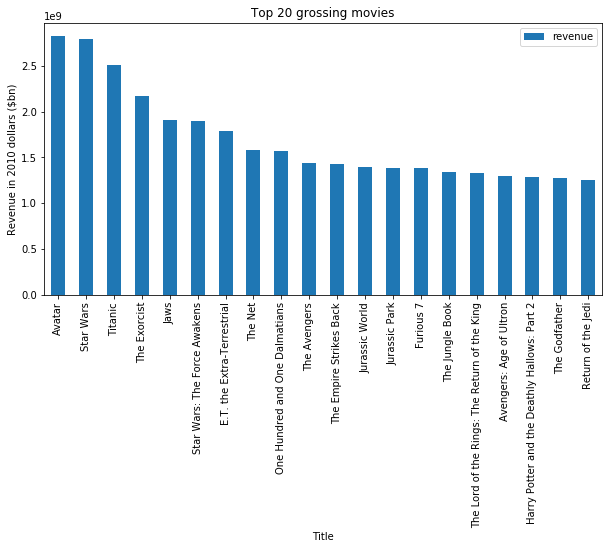

In [46]:
# get the names of the top 20 grossing titles 
high_grossers = pd.DataFrame()
titles = []
revenues = []

for i in sorted_revenue.index:
    titles.append(movies.loc[i,'original_title'])
    revenues.append(sorted_revenue.loc[i])
    
high_grossers['Title']=titles
high_grossers['revenue']=revenues
high_grossers.set_index('Title',inplace=True)

high_grossers.plot(kind='bar',title='Top 20 grossing movies',figsize=(10,5));
plt.ylabel('Revenue in 2010 dollars ($bn)');


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [47]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0